/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best Lag Selected: 6
Mean Squared Error (MSE): 77.4140
Root Mean Squared Error (RMSE): 8.7985
Mean Absolute Error (MAE): 6.8769
R² Score: 0.1240

Recent 5 Days (Actual vs Predicted):
Day 96 => Actual: 229.57, Predicted: 237.74
Day 97 => Actual: 228.20, Predicted: 237.84
Day 98 => Actual: 231.20, Predicted: 237.95
Day 99 => Actual: 236.91, Predicted: 238.06
Day 100 => Actual: 241.25, Predicted: 238.16


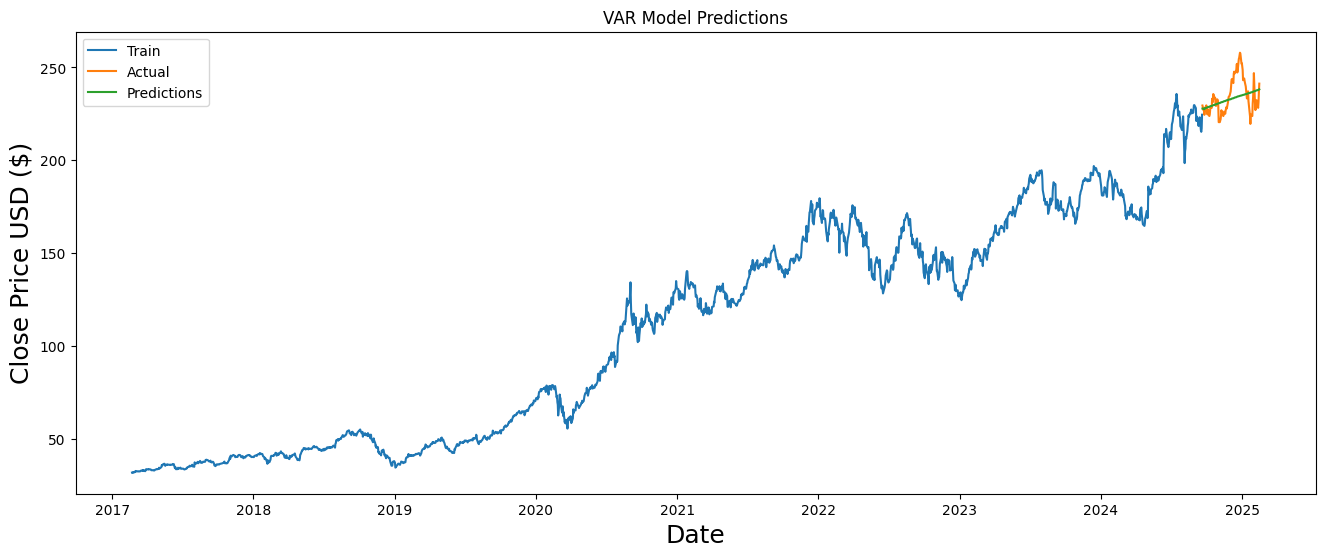

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


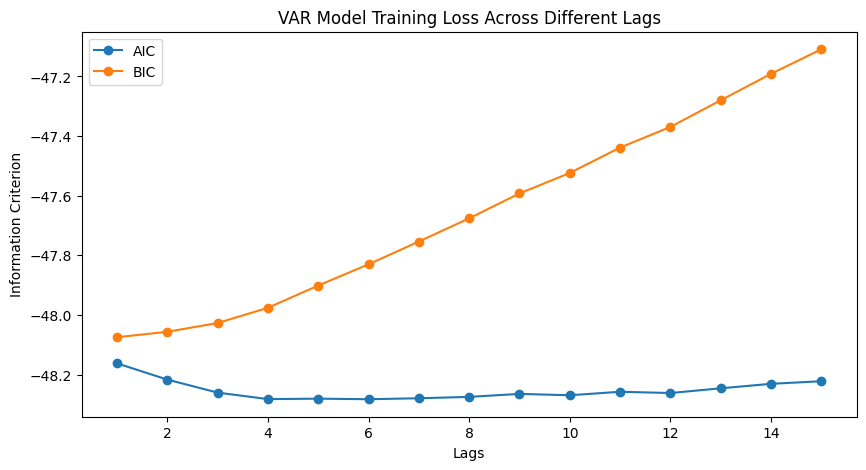

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to load and preprocess stock data
def fetch_data(file_path):
    df = pd.read_pickle(file_path)  # Load data from pickle file
    df = df[df['company_name'] == 'AAPL']  # Filter for AAPL stock data
    df.set_index('Date', inplace=True)
    return df[['Close', 'Open', 'High', 'Low', 'Volume']]  # Include multiple features

# Function to preprocess data for VAR model
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    df_scaled = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
    return df_scaled, scaler

# Function to determine the best lag using AIC
def determine_best_lag(train_data, max_lags=15):
    aic_values = {}
    for lag in range(1, min(max_lags, len(train_data) - 1)):
        try:
            model = VAR(train_data)
            model_fitted = model.fit(lag)
            aic_values[lag] = model_fitted.aic
        except Exception as e:
            print(f"Skipping lag {lag} due to error: {e}")

    best_lag = min(aic_values, key=aic_values.get)  # Lag with lowest AIC
    print(f"Best Lag Selected: {best_lag}")
    return best_lag

# Modified evaluation function to calculate MSE, RMSE, MAE, and R²
def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

# Function to visualize results
def visualize_results(data, test, forecast):
    train_size = int(len(data) * 0.95)
    train = data.iloc[:train_size]
    valid = data.iloc[train_size:].copy()
    valid['Predictions'] = forecast

    plt.figure(figsize=(16, 6))
    plt.title('VAR Model Predictions')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'], label='Train')
    plt.plot(valid['Close'], label='Actual')
    plt.plot(valid['Predictions'], label='Predictions')
    plt.legend()
    plt.show()

# Function to compute and visualize AIC/BIC for different lags
def visualize_loss(train_data):
    plt.figure(figsize=(10, 5))
    aic_values, bic_values = [], []
    max_lags = min(16, len(train_data) - 1)  # Ensure lag count doesn't exceed data length
    lags = range(1, max_lags)

    for lag in lags:
        try:
            model = VAR(train_data)
            model_fitted = model.fit(lag)
            aic_values.append(model_fitted.aic)
            bic_values.append(model_fitted.bic)
        except Exception as e:
            print(f"Error for lag {lag}: {e}")
            aic_values.append(np.nan)
            bic_values.append(np.nan)

    plt.plot(lags, aic_values, label='AIC', marker='o')
    plt.plot(lags, bic_values, label='BIC', marker='o')
    plt.xlabel('Lags')
    plt.ylabel('Information Criterion')
    plt.title('VAR Model Training Loss Across Different Lags')
    plt.legend()
    plt.show()

def modelBuildingVAR():
    data = fetch_data('stock_data.pkl')  # Load stock data from pickle file
    scaled_data, scaler = preprocess_data(data)
    df_scaled = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

    train_size = int(len(df_scaled) * 0.95)
    train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

    # Determine the best lag dynamically
    best_lag = determine_best_lag(train)

    model = VAR(train)
    model_fitted = model.fit(best_lag)

    # Forecasting
    lag_order = model_fitted.k_ar
    test_input = train.values[-lag_order:]
    forecast_scaled = model_fitted.forecast(test_input, steps=len(test))

    # Reverse scaling
    forecast = scaler.inverse_transform(forecast_scaled)
    actual = scaler.inverse_transform(test)

    # Evaluate model with extended metrics
    evaluate_model(actual[:, 0], forecast[:, 0])

    # Print the most recent 5 days of actual vs predicted
    recent_days = 5
    print("\nRecent 5 Days (Actual vs Predicted):")
    for i in range(-recent_days, 0):
        day_index = len(actual) + i
        print(f"Day {day_index} => Actual: {actual[i, 0]:.2f}, Predicted: {forecast[i, 0]:.2f}")

    # Visualize results
    visualize_results(data, actual[:, 0], forecast[:, 0])

    # Visualize AIC/BIC for different lags
    visualize_loss(train)

if __name__ == "__main__":
    modelBuildingVAR()
